# Loan Data Exploration


## by Xiaohua Chen

## Investigation Overview

The data exploration starts with distributions of key attributes related to a loan: interest rate and outcome (defaulted or not). Supporting variable, such as monthly income, is also illustrated.
The investigations focus mainly on factors that may affect a loan's interest rate and outcome. For example, how the borrower's income or credit score are correlated with interest rate, and what factors may influence whether the loan is defaulted. In addition, loan original amount and credit score relationship is looked into. We'll also see later in the presentation, how credit score and borrower's monthly income related to the probability of the loan being defaulted.

## Dataset Overview

This data set contains 113,937 
loans with 81 attributes on each loan, including loan amount, borrower rate (interest rate), current loan status (completed, current, defaulted, ...), borrower's income, borrower's credit score, whether borrower is homeowner, borrower's debt to income ratio, etc. 

In [22]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline
# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [23]:
#Load the data set
df = pd.read_csv('C:/Users/xiaoh/Udacity/Project6/prosperLoanData.csv')

In [24]:
# Select the following columns for analysis:
select_metrics = ['ListingNumber','Term', 'LoanStatus', 'BorrowerRate',
                  'IsBorrowerHomeowner', 'CreditScoreRangeLower', 
                  'DebtToIncomeRatio','StatedMonthlyIncome', 'LoanOriginalAmount']


In [25]:
remove_metrics = df.columns.difference(select_metrics)

# note: df = pd.read_csv('...', usecols = select_metrics ) can be used 
df.drop(columns = remove_metrics, inplace = True)

df.drop_duplicates(inplace = True)
df.shape

(113066, 9)

In [26]:
df.rename(columns = {'CreditScoreRangeLower':'CreditScore'}, inplace = True)

In [27]:
df['LoanS'] = df.LoanStatus

df.LoanS = df.LoanS.map({'Current':'Current', 'Completed':'Completed', 'FinalPaymentInProgress':'Completed','Chargedoff':'Default', 'Defaulted':'Default',
                                'Past Due (1-15 days)':'PastDue', 'Past Due (31-60 days)':'PastDue','Past Due (91-120 days)':'PastDue',
                                'Past Due (61-90 days)':'PastDue','Past Due (16-30 days)':'PastDue','Past Due (>120 days)':'PastDue'}) 

ls = ['Completed','Current','PastDue','Default']
t = pd.api.types.CategoricalDtype(categories = ls, ordered = True)
df.LoanS = df.LoanS.astype(t)

In [28]:
df.loc[df.StatedMonthlyIncome < 1, 'StatedMonthlyIncome']= np.nan
df.loc[df.DebtToIncomeRatio > 2, 'DebtToIncomeRatio'] = np.nan

In [29]:
df.drop(columns= 'ListingNumber', inplace = True)

## Borrower Rate Distribution

Borrower Rate ranges from 0 to 0.5, with main values distributed between 0.05 ~ 0.36. It has a multimodal distribution with highest peaks around 0.15 and 0.31

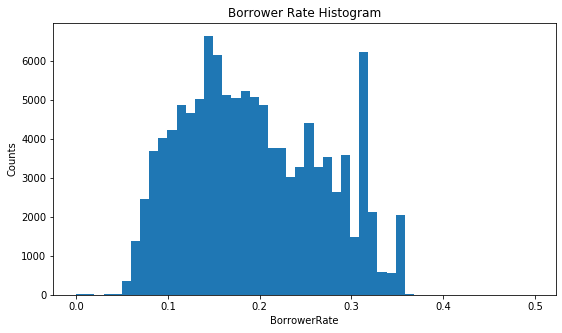

In [30]:
# look into BorrowerRate with finer granularity
plt.figure(figsize = [9,5])
plt.hist(data = df, x = 'BorrowerRate', bins = 50)
plt.title('Borrower Rate Histogram')
plt.xlabel('BorrowerRate')
plt.ylabel('Counts');

## Monthly Income Distribution
Monthly income follows a lognormal-like distribution, with majority between 800 and 25,000 and peak around 4,000~5,000.

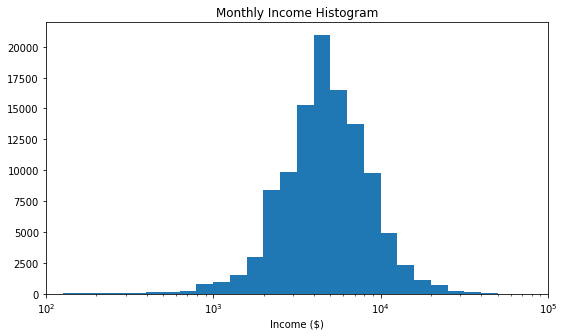

In [31]:
# a 'normal' look at the montly income, ignoring the extremely low values of income
plt.figure(figsize = [9,5])
xt = 10**np.arange(1,7, 0.1)
plt.hist( x = df['StatedMonthlyIncome'], bins= xt )
plt.xscale('log')
plt.xlabel('Income ($)')
plt.title('Monthly Income Histogram')
plt.xlim(100, 100000);

## Distribution of Loan Status
Majority of LoanStatus is 'current' or 'completed', followed by 'chargedoff' or 'defaulted'. Very small portions belong to various 'past due' categories.
Combine the 'past due' categories into one category - 'PastDue'.


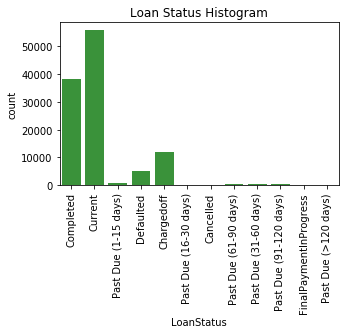

In [32]:
plt.figure(figsize = [5,3])
b_color = sb.color_palette()[2]
sb.countplot(data = df, x = 'LoanStatus', color = b_color)
plt.xticks(rotation = 90)
plt.title('Loan Status Histogram');

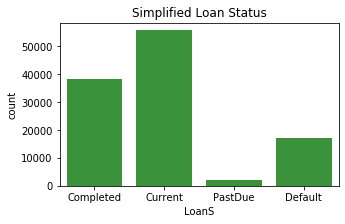

In [33]:
plt.figure(figsize = [5,3])
df_ls = df[df.LoanS.isna()  == False] #define df_ls to be excluding the cancelled loans
sb.countplot(df_ls.LoanS, color = b_color)
plt.title('Simplified Loan Status');

## Correlation Matrix among Variables
The correlation heatmap indicates strong to moderate degrees of correlation between:
* Borrower Rate and Credit Score
* Borrower Rate and Loan Original Amount
- Credit Score and Loan Original Amount
- Borrower Home Ownership and Credit Score
- Term and Load Original Amount


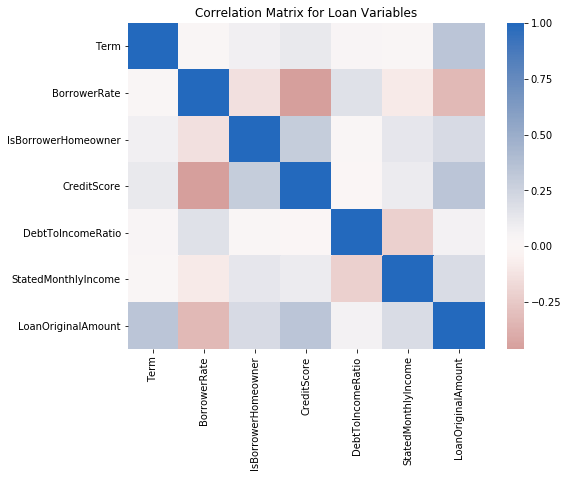

In [34]:
plt.figure(figsize = [8,6])
sb.heatmap(data = df.corr(), cmap = 'vlag_r', center = 0 )
#work-around matplotlib 3.1 issue
b,t = plt.ylim()
plt.ylim(b+0.5, t-0.5)
plt.title('Correlation Matrix for Loan Variables'); 

## Borrower Rate vs. with other variables
- BorrowerRate is lower with higher CreditScore
- BorrowerRate is lower with lower DebtToIncomeRatio
- BorrowerRate is lower with higher StatedMonthlyIncome
- BorrowerRate is lower with Home owners 


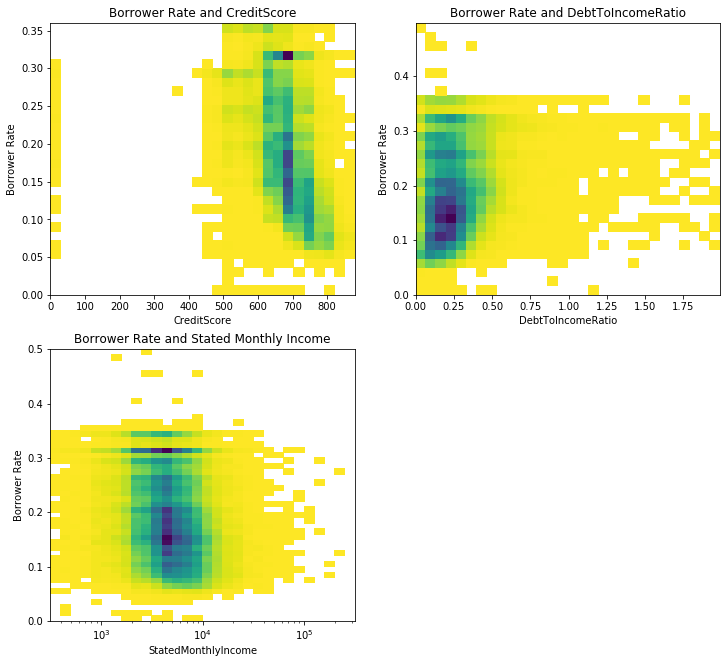

In [35]:
plt.figure(figsize = [12, 11])
i=0
#numeric features:
for m in ['CreditScore','DebtToIncomeRatio']:
    i+=1
    plt.subplot(2,2,i)
    plt.hist2d(data = df[df[m].isna()==False], y = 'BorrowerRate', x =m, cmap = 'viridis_r', cmin = 0.5 , bins = 30)
    plt.xlabel(m)
    plt.ylabel('Borrower Rate')
    plt.title('Borrower Rate and '+m)

#plot rate vs income with log scale on income
i+=1
plt.subplot(2,2,i)
xt = 10**np.arange(2.5, 5.51, 0.1) #monthly income 300 ~ 300,000
yt = np.arange(0, 0.51, 0.01)
plt.hist2d(data = df, y = 'BorrowerRate', x ='StatedMonthlyIncome', bins = [xt, yt], cmap = 'viridis_r', cmin = 0.5)
plt.xscale('log')
plt.xlabel('StatedMonthlyIncome')
#plt.colorbar()
plt.ylabel('Borrower Rate')
plt.title('Borrower Rate and Stated Monthly Income');



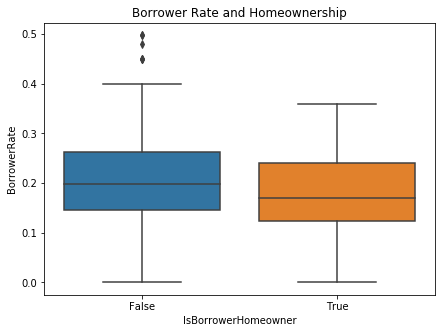

In [36]:
plt.figure(figsize = [7, 5])

sb.boxplot(data = df, y = 'BorrowerRate', x ='IsBorrowerHomeowner' )
plt.title('Borrower Rate and Homeownership');

## Loan status vs. other variables 
- Default loans have lower CreditScore
- Default loans have lower StatedMonthlyIncome
- Current loans have higher LoanOriginalAmount


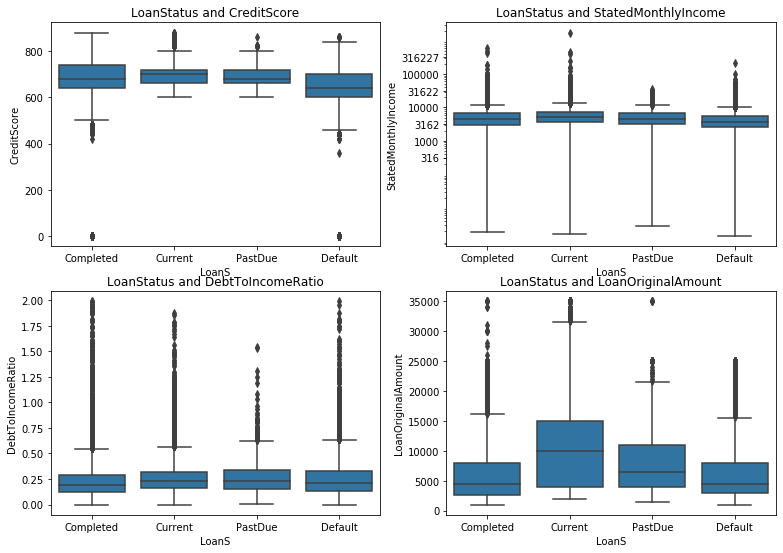

In [90]:
a_color = sb.color_palette()[0]
plt.figure(figsize = [13,14])
i=0
for m in [ 'CreditScore']:
    i+=1
    plt.subplot(3,2,i)
    sb.boxplot(data = df_ls, x= 'LoanS', y = m, color = a_color)
    plt.title('LoanStatus and '+m)
 
i+=1
plt.subplot(3,2,i)
yt = 10**np.arange(2.5, 5.51, 0.5) #monthly income 300 ~ 300,000 in log scale
sb.boxplot(data = df_ls, x= 'LoanS', y = 'StatedMonthlyIncome', color = a_color)
plt.yscale('log')
plt.yticks(yt, yt.astype(int))
#plt.ylim(100, 320000)
plt.title('LoanStatus and StatedMonthlyIncome')

for m in [ 'DebtToIncomeRatio', 'LoanOriginalAmount' ]:
    i+=1
    plt.subplot(3,2,i) 
    sb.boxplot(data = df_ls, x= 'LoanS', y = m, color = a_color)
    plt.title('LoanStatus and '+m)

  

## Loan Original Amount and Credit Score

How much the Loan Original Amount is limited by Credit Score.

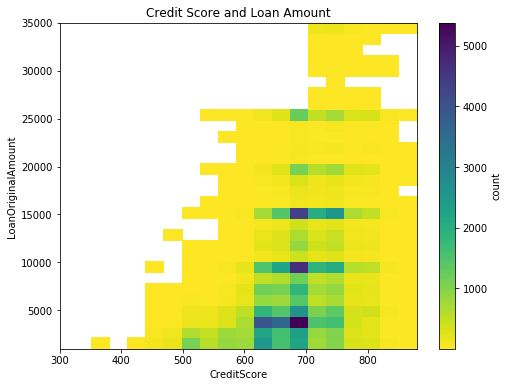

In [98]:
plt.figure(figsize= [8,6])
plt.hist2d(data = df[df.CreditScore.isna() ==False], x ='CreditScore', y = 'LoanOriginalAmount',
           cmap = 'viridis_r', cmin = 0.5, bins = 30)
plt.xlabel('CreditScore')
plt.ylabel('LoanOriginalAmount')
plt.title('Credit Score and Loan Amount')
plt.xlim(left = 300)
plt.colorbar(label = 'count');

## Loan Default Rate vs. Income and Credit Rating
- Loan default probability is highly correlated with income. Lower income is associated with higher loan default probability. <br>At the same time, 
- Credit score also has strong correlation with loan default probability. Lower credit rating is more likely to see loan defaulted. 

In [76]:
#Loan default rate, home owner, Monthly income
df['LoanDefault'] = (df.LoanS == 'Default')


# need to convert continuous income values to descrete levels
i_b = np.percentile(df[df.StatedMonthlyIncome.isna() == False].StatedMonthlyIncome, np.arange(0,101, 10))
i_l = np.percentile(df[df.StatedMonthlyIncome.isna() == False].StatedMonthlyIncome, np.arange(5,96, 10))

# Creat income level and credit rating
df['IncomeLevel'] = pd.cut(df.StatedMonthlyIncome, bins = i_b, labels = np.arange(10) )

c_l = np.quantile(df[df.CreditScore.isna()==False].CreditScore, np.arange(0, 1.1, 0.25))
df['CreditScoreRS'] = pd.cut(df.CreditScore, c_l, labels = ['Low','mid-low','mid-high','high'])


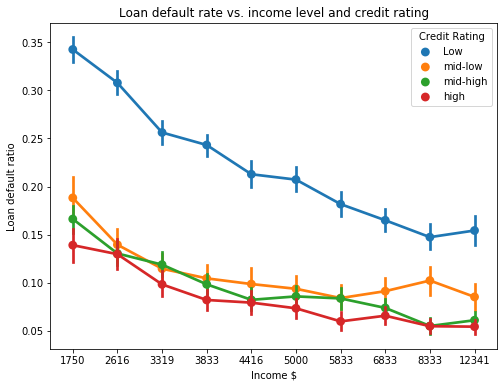

In [99]:
plt.figure(figsize= [8,6])
sb.pointplot(data = df, x='IncomeLevel', y='LoanDefault', hue = 'CreditScoreRS')
plt.xticks(ticks = np.arange(10),labels = i_l.astype('int'))
plt.title('Loan default rate vs. income level and credit rating')
plt.xlabel('Income $')
plt.legend(title = 'Credit Rating')
plt.ylabel('Loan default ratio');